# Dot 语言完全指南

## 一些参考资料


1. [The DOT Language](https://www.graphviz.org/doc/info/lang.html)
2. [Command-line Usage](https://www.graphviz.org/doc/info/command.html)
3. [Output Formats](https://www.graphviz.org/doc/info/output.html)
4. [Graph Attributes](https://www.graphviz.org/doc/info/attrs.html) 这个文档比较关键，列举了所有可以用的属性
5. [Node Shapes](https://www.graphviz.org/doc/info/shapes.html)
6. [Colors](https://www.graphviz.org/doc/info/colors.html)
7. [Arrow Shapes](https://www.graphviz.org/doc/info/arrows.html)

## 基础表达式介绍

图分为两种：
1. 有向图 digraph，图内节点（edgeop）要用 `->` 表示
2. 无向图 graph，图内节点要用 `--` 表示

In [23]:
digraph {
    label = "有向图";
    a -> b;
}

In [22]:
graph {
    label = "无向图";
    a -- b;
}

可以为 graph/digraph 指定 ID，不过这是可选的；

紧跟着的 {} 中写表达式，表达式之间用 `;` 隔开；

下面这样写也是合法的，虽然很丑。

In [28]:
digraph sample {
    a -> b
    b -> c;
    c -> d
    d -> a;
}

表达式总共只有 5 种：
1. 节点(node)表达式
2. 边(edge)表达式
3. 属性(attr)表达式
4. ID 赋值表达式 `ID = ID`
5. 子图(subgraph)

### 节点表达式

语法是 `node_id[attr_list]` (中括号表示是 **可选的**）

可以仅仅是一个 `node_id`，也可以跟上 `attr_list`，如果中间有空格，会被当成多个不同的 node。

In [45]:
graph {
    node_a;
    node_b[color=red];
    node_c[];
    node_d[regular=true][color=green];
    node_e[regular=true; shape=triangle];
    node_f[fillcolor=red, shape=star];
    node_x node_y node_z;
}

### 边表达式

边表达式从一个 node 或者 subgraph 为起点，后面跟 `edgeop node_id 或 subgraph` (我们会将这块表达式称为 `edgeRHS`).

最后面如同节点表达式一样，可以跟 `attr_list`，也可以不跟。

`edgeRHS` 可以是多个，至少为1个。


In [51]:
graph {
    node_a -- node_b;
    node_c -- node_d -- node_e;
    node_x -- node_y -- subgraph {a -- b -- c};
    star -- triangle[color=red];
}

另外要注意的是，在节点表达式中，node 是 `node_id` 而不是 node 表达式。

比如下面这个企图在边表达式中掺杂节点表达式的行为，是无法编译通过的。

In [ ]:
graph {
    a[color=green] -- b;
}

### 属性表达式

`attr_list` 我们在上面已经见到过了，它是一系列属性单元放在中括号中。

`attr_list` 单元需要注意一下几点：

1. 必须在中括号中，通过节点表达式那一节来体会吧。
2. 可以多个连续。 `[color=red][shape=star]` 是合法的。这是两个 `attr_list`.
3. 可以包含多个属性单元，中间用 `,` 或者 `;` 来分割。
4. 每一个属性单元用 `ID = ID` 来表达。

了解了 `attr_list`，其实属性表达式就很简单了。它是对 graph node edge 中的一种定义，这是会影响全局的。

它只会存在于 graph/digraph 和 subgraph 的 `{}` 中，不会再嵌套到其他地方了。表达节点、边、图的属性。

In [81]:
graph {
    node[shape=rect];
    graph[color=green];
    edge[color=red];
    
    a -- b;
    c -- d -- e;
}

### ID 赋值表达式

这个很简单，上面已经见到过了，这是属性单元表达的基础，需要注意的是，ID 是不需要加引号的，新的 token 会被定义为ID。

如果有需要，可以被双引号包裹。

In [61]:
graph {
    这 可以 是 不同的 ID;
    "但 这会是 1 个 ID。";
}

### 子图表达式

一个子图可以用 `subgraph ID { 上面介绍过的 5 种表达式 }` 来表达。

但是 `subgraph` 关键字和 `ID` 都是可以省略的。

In [66]:
graph {
    a -- subgraph sub {c, d, e};
    a -- c[color=red];
}

In [78]:
graph {
   a -- {node[color=green]; b, c};
}

## 总结

以上基本就是 dot 语言所有的基础了，是不是很简单。

如果你能看懂 AST 抽象语法树的话，可以看一下 dot 的 AST，以下就是全部 AST。

- 粗体表示 关键字，斜体表示 非关键字（语义）
- `[]` 内的内容都是可选的
- 单引号内的内容是字面含义（Literal）
- 括号内容表示一组内选择其一 `(xxx|yyy)`

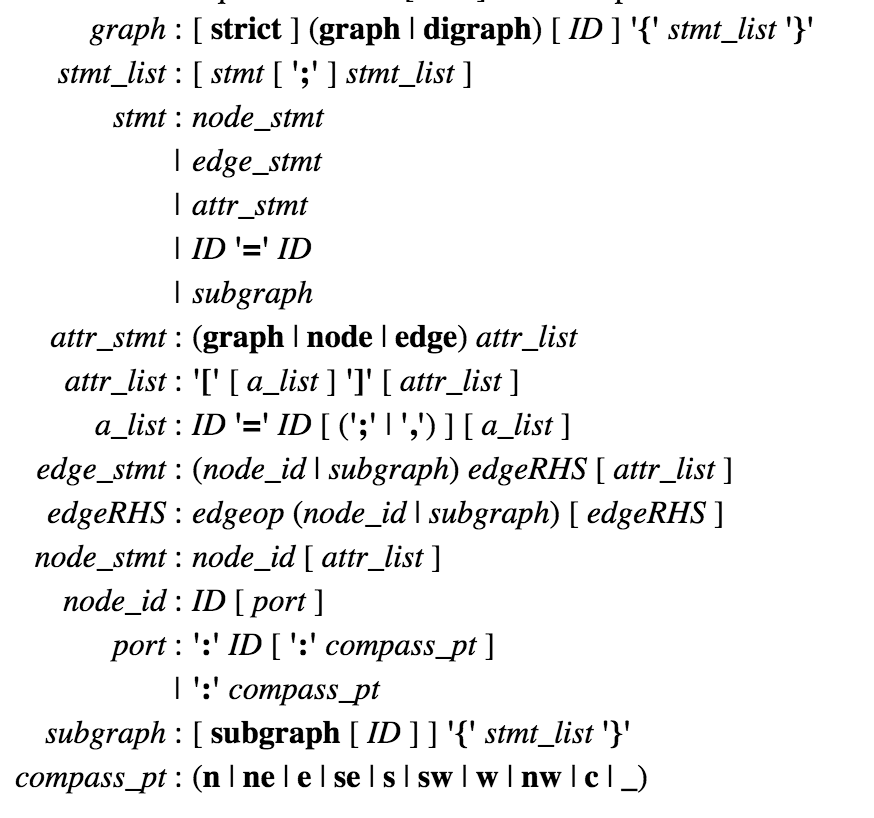

## 测试

测试一下自己，看能不能画出来下面这个图吧。

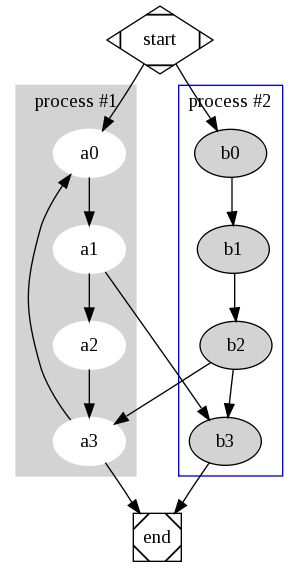

答案在这里 [Clusters](https://graphviz.gitlab.io/_pages/Gallery/directed/cluster.html)